#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

https://archive.ics.uci.edu/dataset/45/heart+disease

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0

To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

## 1. Loading and getting a first impression of data :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
heart=pd.read_csv('Heart_Disease.csv')

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart.shape

(303, 14)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

- The Data Set consists of 303 Rows and 14 Columns.
- The type of all the variables in the data set are in numerical format. (Integer Or Float)
- No null values on first impression
- Dataset is almost balanced
- Most of the numerical columns seems Normally Distibuted other than oldpeak ,still we'll check using Histogram.
- Our priority class is Class 1 i.e to correctly predict the heart disease for further treatment.

## 2. Exploratory Data Analysis :

In [8]:
#Creating a copy of dataframe for further analysis:
df=heart.copy()

### 2.1 Checking Null Values :

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Good News ,we don't have to deal with *Null Value* issue, so we are good to go. 

### 2.1 Seperating the Numerical and Categorical Variable :

In [10]:
numerical_col=[]
categorical_col=[]
for i in df.columns :
    if len(df[i].unique())>5: # more than 5 unique value columns will be considered numerical 
        numerical_col.append(i) #appending those coloumn to numerical_col list
    else:
        categorical_col.append(i) # less than 5 unique value columns
numerical_col.append('target') 

In [11]:
print('Numerical columns with Target : ',numerical_col)
print('Categorical columns with Target: ',categorical_col)

Numerical columns with Target :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
Categorical columns with Target:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


### 2.2 Univariate Analysis of Numerical Variables :
-  **'age', 'trestbps', 'chol', 'thalach', 'oldpeak'**

In [12]:
#Statistics of the Numerical Variables
df[numerical_col].describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


- Age: The age range in the dataset is from 29 to 77, with a mean (average) age of approximately 54.4 years and a standard deviation of about 9.1 years.
- Trestbps: The resting blood pressure ranges from 94 to 200 mmHg, with a mean of around 131.6 mmHg and a standard deviation of roughly 17.5 mmHg.
- Chol: Serum cholesterol levels vary from 126 to 564 mg/dL, with an average (mean) value of about 246.3 mg/dL and a standard deviation of around 51.8 mg/dL.
- Thalach: Maximum heart rate achieved ranges from 71 to 202 beats per minute (bpm), with a mean of about 149.6 bpm and a standard deviation of approximately 22.9 bpm.
- Oldpeak: ST depression induced by exercise relative to rest ranges from 0 to 6.2, with a mean of approximately 1.04 and a standard deviation of roughly 1.16.

In [13]:
#Defining a function to plot histogram and boxplots
def plot_column(dataframe,column_name):
    sns.set_theme(style='dark')

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(data=df, x=column_name, ax=axes[0], kde=True, bins=5,color='skyblue', edgecolor='black')
    sns.boxplot(data=df, x=column_name, ax=axes[1],palette='Set3',showmeans=True )
    
    axes[0].set_title(f'Histogram of {column_name.upper()}')
    axes[1].set_title(f'Boxplot of  {column_name.upper()}')
    
    axes[0].set_xlabel(f'{column_name.capitalize()}')
    axes[1].set_xlabel(f'{column_name.capitalize()}')
    
    plt.tight_layout()
    plt.show()

#### 2.2.1 Age 

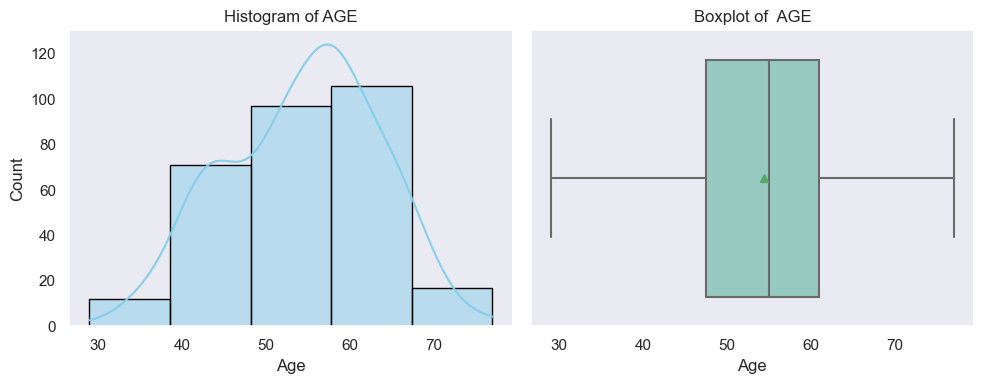

In [14]:
plot_column(df,'age')

- Age is normally distributed,ideal for ML algorithms.
- No outliers present.
- Majority of people in the study are between 50-60years.

#### 2.2.2 trestbps: resting blood pressure

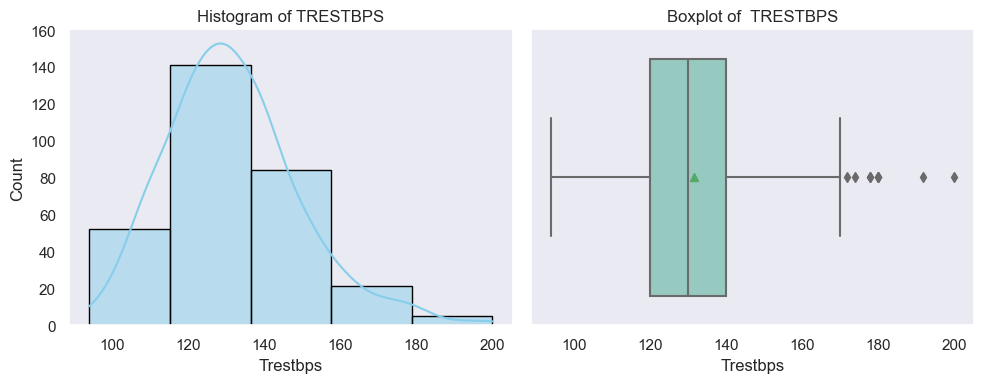

In [15]:
plot_column(df,'trestbps')

- Data is slightly right skewed still prone to Normal Distribution ,showing presence of outliers ,which is evident in the boxplot.
- Clearly there datapoints as outliers in the upper range ,so have to study them if they are justified or not with respect to Target.
- A resting blood pressure of 120 or less is considered to be healhty , and here majority of people are on the borderline of 120-140 ,but few people are going way beyond 120.

#### 2.2.3 Cholestrol 

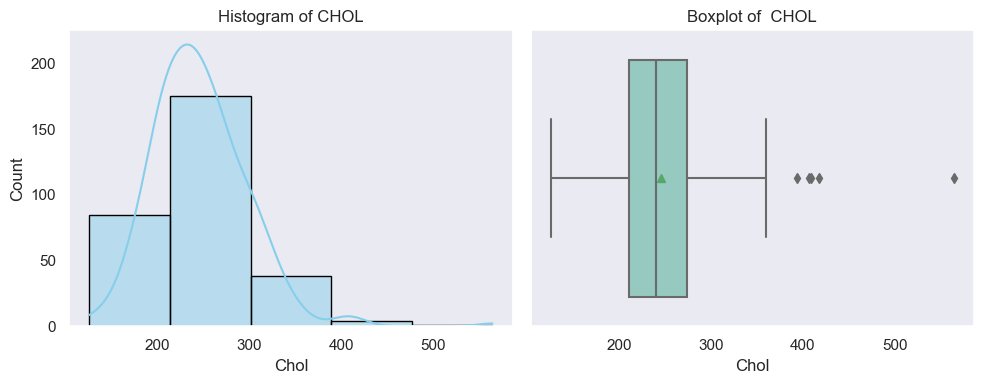

In [16]:
plot_column(df,'chol')

- Slightly right skewed , with the presence of few outliers.
- This variable also requires outlier treatment. 
- Spread of the values are quite wide ,ranging from 100+ to 500+ ,or to be precise from 124 to 564.
- It's a well known fact high cholestrol leads to heart disease , so if these data points are justified ,we'll keep it otherwise remove it.

#### 2.2.4 thalach: maximum heart rate achieved

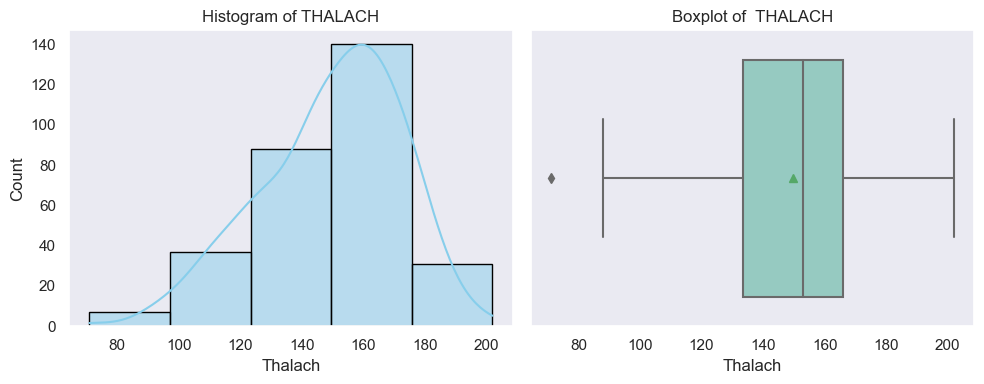

In [17]:
plot_column(df,'thalach')

- This is also Normally distributed ,with some outlier presence.

#### 2.2.5 oldpeak: ST depression induced by exercise relative to rest

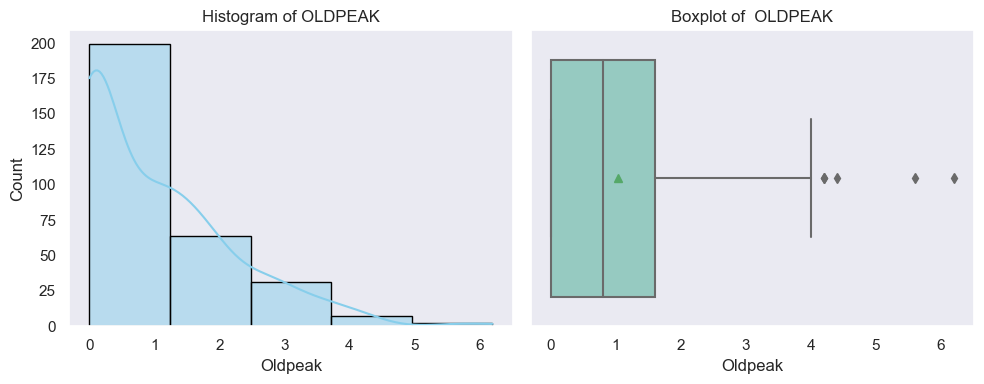

In [18]:
plot_column(df,'oldpeak')

- An oldpeak value of 0 or near by 0 is considered good ,and the data shows that majority of people are near 0 in terms of oldpeak.
- Though it is heavily right skewed ,as it is upto value of 6.20 from 0.
- Outlier treatment is required in this variable too. 

### 2.3 Univariate Analysis of Categorical Variables :
- **'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'**

In [19]:
#Defining a function to plot pieplot and countplot
def plot_cat_column(dataframe,column_name):
    sns.set_theme(style='dark')

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    counts = dataframe[column_name].value_counts()
    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                colors=sns.color_palette('Set1'), startangle=90,shadow=True)
    
    sns.countplot(data=df, x=column_name, ax=axes[1],palette='Set1')
    
    axes[0].set_title(f'Pie-Chart of {column_name.upper()}')
    axes[1].set_title(f'CountPlot of  {column_name.upper()}')
    
    axes[0].set_xlabel(f'{column_name.capitalize()}')
    axes[1].set_xlabel(f'{column_name.capitalize()}')
    
    plt.tight_layout()
    plt.show()

#### 2.3.1 Sex :

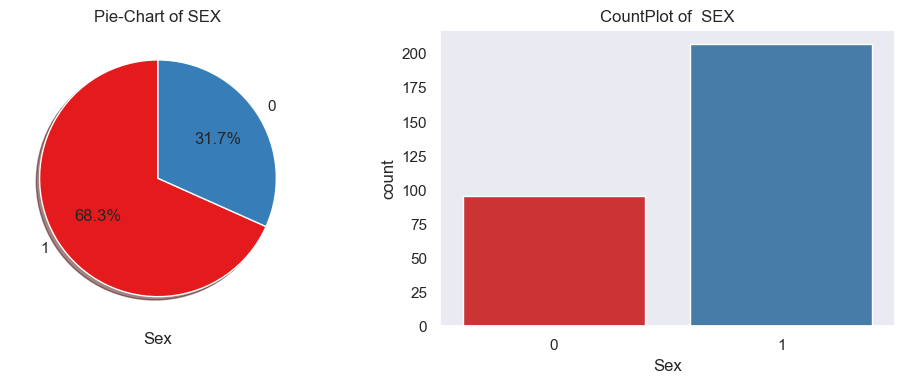

In [20]:
plot_cat_column(df,'sex')

- Majority of people for the study are male ,more than half.
- The Machine-Learning models for the given dataset will be more suited for male popultion as compared to female population ,in case gender plays role in heart disease.


#### 2.3.2 cp:chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)


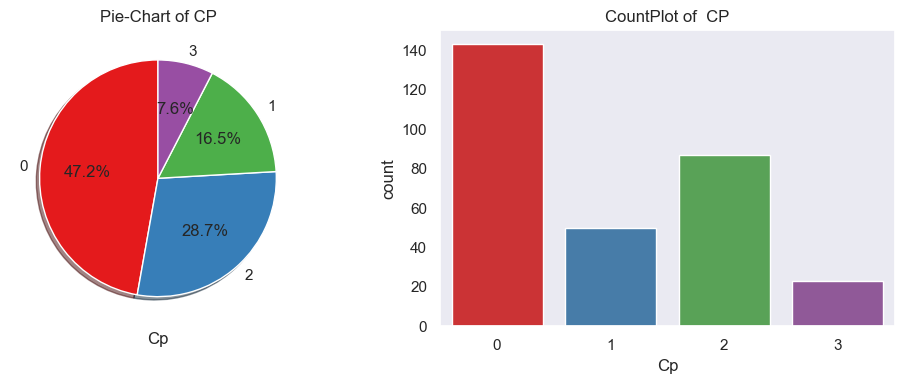

In [21]:
plot_cat_column(df,'cp')

- MAjority of people are asymptotic for heart problem.
- Almost half of the patients (**47.2%**) have an observation value of 0. In other words, there is asymptomatic angina
  - This type of people have pain without symptoms,They might have heart disease or related conditions without experiencing symptoms.
- If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2 i.e atypical angina is in **29%** of the patients.
  -  This observation value shows patients having a cardiac origin ,doesn’t completely fit the typical symptoms.
* **16.5%** of patients have a value of 1 i.e typical angina is seen. 
   - Typical angina is the classic exertion pain that comes during any physical activity or stress,often described as a pressing, squeezing, or tightness sensation in the chest 
- The other **8%** has the value of non-anginal pain
  - This refers to chest discomfort that doesn't fit the typical angina description and isn't related to the heart. It might have various causes, such as musculoskeletal issues, respiratory problems, or digestive conditions like acid reflux.

#### 2.3.3 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

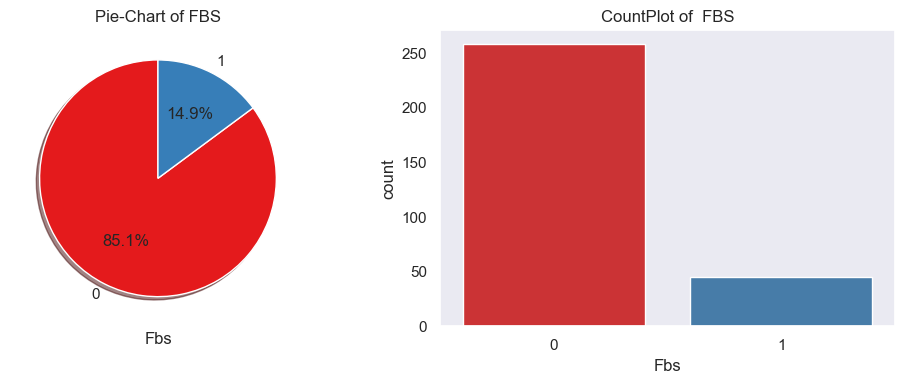

In [22]:
plot_cat_column(df,'fbs')

- Very few people has high blood sugar (**14.9%**).
- It's a well kown fact that ,consistent high fasting blood sugar leads to Diabetes , during Bi-Variate analysis we'll try to find out if this leads to heart disease or not !! 

#### 2.3.4 restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

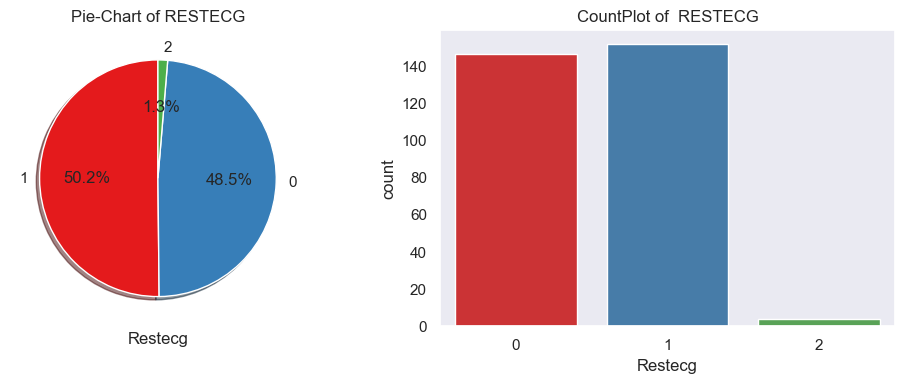

In [23]:
plot_cat_column(df,'restecg')

- **Normal (Type 1)**: Half of the people(**50.2%**) have a normal ECG means that the electrical activity in the heart is within expected ranges ,suggesting they are healthy individuals 

- **Hypertrophy (Type 0)**: Another half(**48.5%**)indicates indicate signs of hypertrophy, which means an enlargement or thickening of certain parts of the heart, often the walls of the chambers. This could be due to conditions like high blood pressure, heart valve disease, or other cardiac issues.

- **ST-T Wave Abnormality (Type 2)**: Remaining **1.3%** indicates abnormalities suggesting ischemia (lack of blood flow to the heart), previous heart attacks, or other heart-related issues.



#### 2.3.5 exang - exercise induced angina (1 = yes; 0 = no)

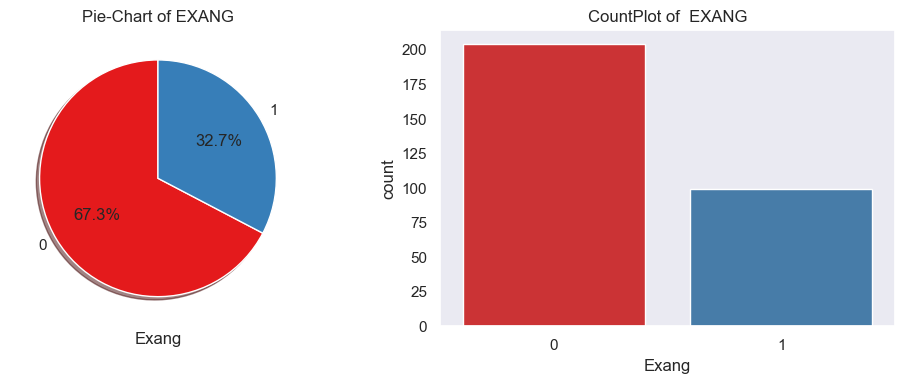

In [24]:
plot_cat_column(df,'exang')

- **Yes (Type 1)** : **32.7%** individual experiences chest pain or discomfort specifically brought on by physical exertion or exercise. This is known as exercise-induced angina.
- **No (Type 0)** : Majority of the individuals(**67.3%**) does not experience chest pain or discomfort during physical activity ,reason of chest pain was someting else

#### 2.3.6 slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

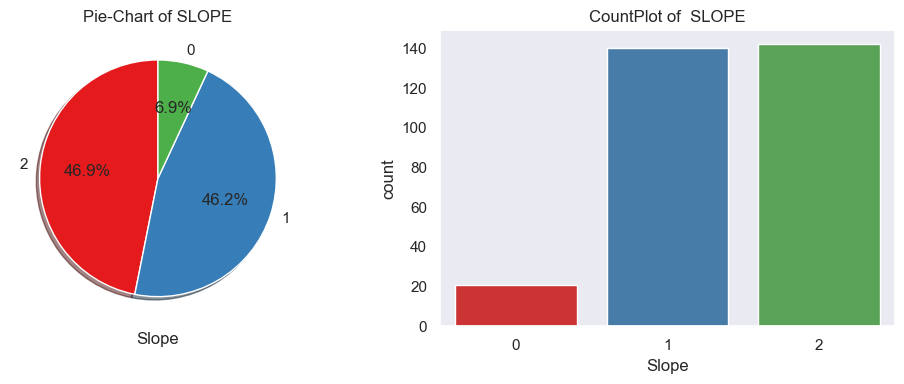

In [25]:
plot_cat_column(df,'slope')

Upsloping (Type 2): An upsloping ST segment during peak exercise indicates a pattern where the ST segment has a rising slope compared to the baseline. This might be considered a less concerning or more benign pattern in certain contexts.

Flat (Type 1): A flat ST segment during peak exercise means that the ST segment remains relatively level without significant elevation or depression from the baseline. This pattern might be interpreted differently depending on the clinical context and other ECG findings.

Downsloping (Type 0): A downsloping ST segment during peak exercise shows a descending slope compared to the baseline. This pattern can be indicative of cardiac stress or ischemia, especially if it's significantly below the baseline or differs from the normal response to exercise.

#### 2.3.7 ca - number of major vessels (0-3) colored by flourosopy

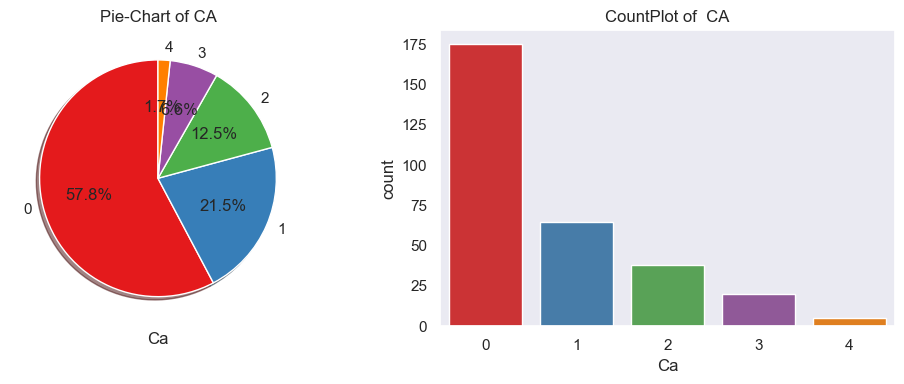

In [26]:
plot_cat_column(df,'ca')

#### 2.3.8 thal -  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

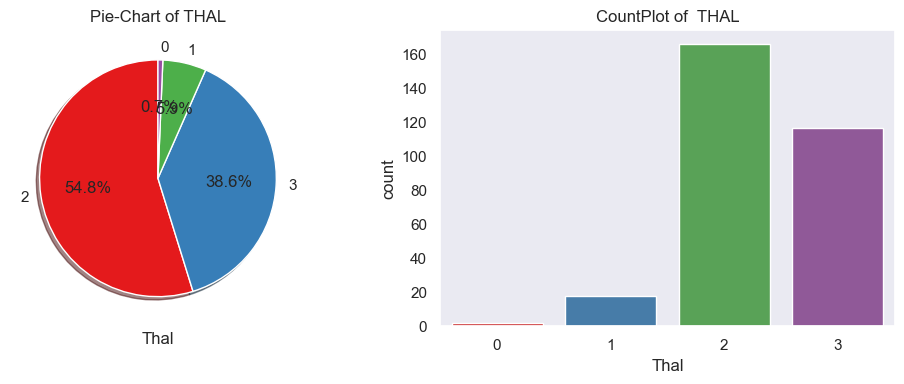

In [27]:
plot_cat_column(df,'thal')

- Seems like there is some inconsitency , as per the dataset description 'thal' supposed to be having 3 values 
    - 3 - Normal
    - 6 - Fixed Defect
    - 7 - Reversable Defect 
    - But here , totally different values are saved i.e 0,1,2,3
- Looking into the original source 'https://archive.ics.uci.edu/dataset/45/heart+disease' , we found out that 
    - Class 3 represented by value '2'
    - Class 6 represnted by value '1'
    - Class 7 represented by value '3'
    - Unknown/Null Values are represented by '0' .
- We can either do the appropriate mapping to match the original dataset , or we can continue with the given values and treat the null values appropriately.

### 2.3 Bi-Variate Analysis of the Variables 

#### 2.3.1 Statsistical Analysis of Variables-Target
- **mannwhitneyu test** - Assesses whether the means of a numerical variable differ between two categories.
- **chi-square test** -Examines the association or independence between two categorical variables.

##### 2.3.1.1 Statistical Analysis of Numerical-Target Variables :

In [28]:
# Separating data into two groups based on the 'target' variable
group_0 = df[df['target'] == 0]
group_1 = df[df['target'] == 1]

# Performing Mann-Whitney U test for each numerical column with respect to 'target'
for column in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    u_statistic, p_value = stats.mannwhitneyu(group_0[column], group_1[column])
    print(f"Column: {column}")
    print("P-Value:", p_value)
    print("-----------------------------")


Column: age
P-Value: 3.4385103183228994e-05
-----------------------------
Column: trestbps
P-Value: 0.03465244526020498
-----------------------------
Column: chol
P-Value: 0.03571518201137642
-----------------------------
Column: thalach
P-Value: 9.796555056515248e-14
-----------------------------
Column: oldpeak
P-Value: 2.406978688694334e-13
-----------------------------


**Interpretation of statistical analysis of numerical variables with respect to Target Variable**
- Age:
    - P-Value: 3.44e-05 (very small)
    - Interpretation: There is a statistically significant difference in the distribution of ages between the two groups (target 0 and target 1). The low p-value suggests strong evidence against the null hypothesis, indicating that the median age differs significantly between the two groups.

- Trestbps (Resting Blood Pressure):
    - P-Value: 0.0347
    - Interpretation: There is a statistically significant difference in the distribution of resting blood pressure between the two groups. Although the p-value is less significant compared to age, it still suggests evidence against the null hypothesis.

- Chol (Serum Cholesterol Level):
    - P-Value: 0.0357
    - Interpretation: Similar to resting blood pressure, there is a statistically significant difference in serum cholesterol levels between the two groups, though the effect might be slightly weaker compared to age.

- Thalach (Maximum Heart Rate Achieved):
    - P-Value: 9.80e-14 (very small)
    - Interpretation: There is an extremely strong statistical evidence of a difference in the distribution of maximum heart rates achieved between the two groups. The very low p-value indicates a highly significant difference.
- Oldpeak (ST Depression Induced by Exercise Relative to Rest):
    - P-Value: 2.41e-13 (very small)
   - Interpretation: There is an extremely strong statistical evidence of a difference in the distribution of ST depression induced by exercise relative to rest between the two groups. The very low p-value indicates a highly significant difference.

- In summary, all the variables show statistically significant differences in their distributions between the two groups, with **'thalach' (maximum heart rate)** and **'oldpeak' (ST depression)** showing the most pronounced differences.

##### 2.3.1.2 Statistical Analysis of Categorical-Target Variables :

In [29]:
# Performing  chi-square test for each categorical variable against 'target'
for column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    contingency_table = pd.crosstab(df[column], df['target'])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-Square Test for '{column}' against 'target':")
    print("P-Value:", p_val)
    print("-----------------------------")



Chi-Square Test for 'sex' against 'target':
P-Value: 1.8767776216941503e-06
-----------------------------
Chi-Square Test for 'cp' against 'target':
P-Value: 1.3343043373050064e-17
-----------------------------
Chi-Square Test for 'fbs' against 'target':
P-Value: 0.7444281114149577
-----------------------------
Chi-Square Test for 'restecg' against 'target':
P-Value: 0.006660598773498031
-----------------------------
Chi-Square Test for 'exang' against 'target':
P-Value: 7.454409331235655e-14
-----------------------------
Chi-Square Test for 'slope' against 'target':
P-Value: 4.830681934276837e-11
-----------------------------
Chi-Square Test for 'ca' against 'target':
P-Value: 2.712470211959332e-15
-----------------------------
Chi-Square Test for 'thal' against 'target':
P-Value: 2.2333507210129364e-18
-----------------------------


 **Interpretation of Statistical analysis of categorical variable with Target**
- **Strong Association** (Low P-Values,less than 0.05):
   - Variables such as 'sex', 'cp', 'exang', 'slope', 'ca', and 'thal' appear to have a strong relationship with the 'target'. This indicates that these categorical variables might be influential or predictive factors for the condition represented by the 'target'.
- **Weak Association** (Higher P-Values,greater than 0.05):
  - 'fbs' and 'restecg' show higher p-values, suggesting a weaker or possibly no statistically significant relationship with the 'target'. This implies that these variables might not be as influential in determining the 'target' variable.

#### 2.3.2 Analysis of Numerical Variables against Target Variable

- In this section we'll analyse the relationship of *Numerical Variable with respect to the target variable* using plots,and draw our interpretation..

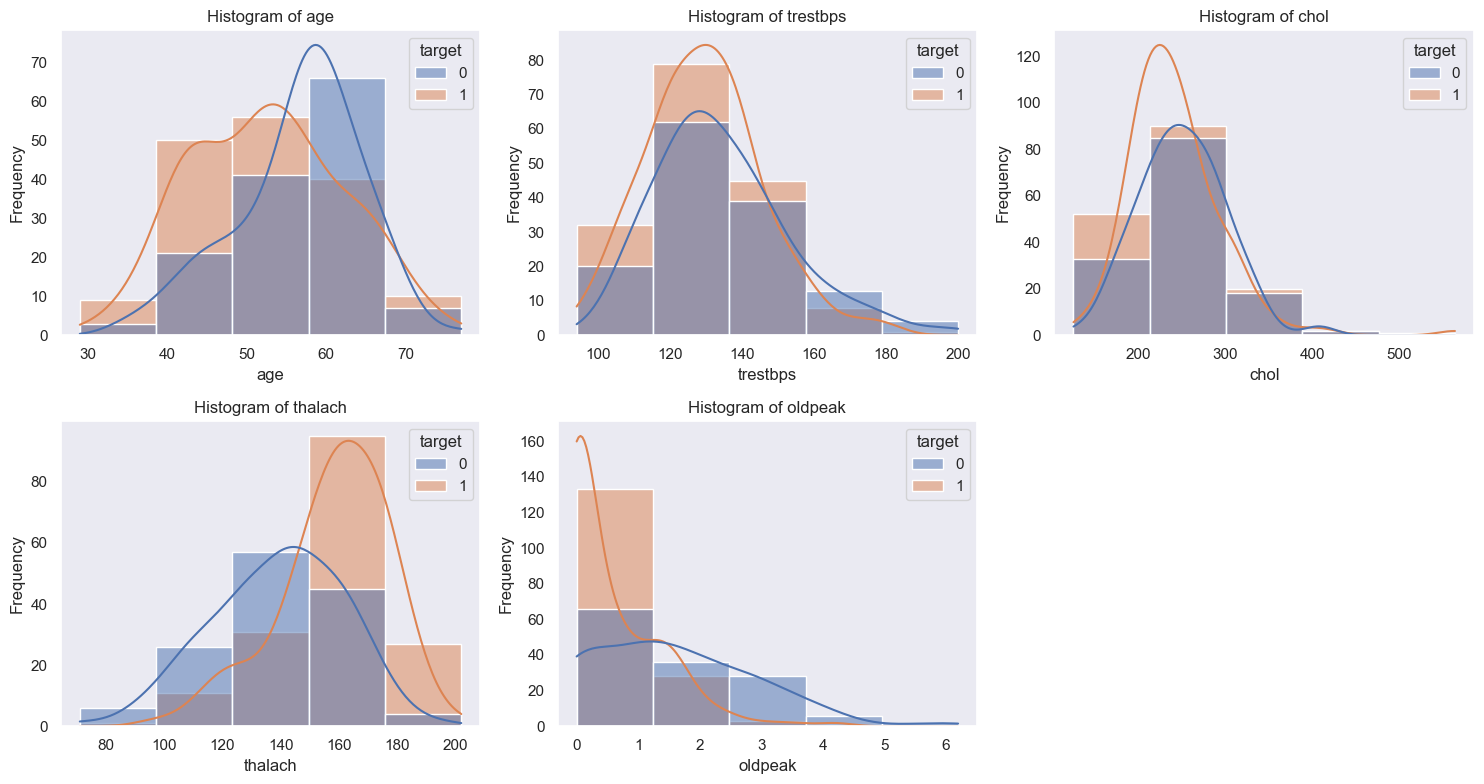

In [30]:
columns = [col for col in numerical_col if col != 'target']

fig, axes = plt.subplots(2,3, figsize=(15, 8))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for all numerical columns using a loop with enumerate
for i, column in enumerate(columns):
    sns.histplot(data=df,x=column, ax=axes[i],bins=5, kde=True,hue='target')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if the number of columns is less than the number of subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout

plt.tight_layout()
plt.show()


**Histogram Observations:**
- **Age** : The probability of having a heart disease is getting more with the age upto 50years ,after 50yrs it is decreasing,contradicting the popular belief ,of correlating age with heart disease.
- **trestbps** : 
    - Some datapoints especially greater than 170 trestbps ,showing unexpected values , even though their resting blood pressure is so high still ,they don't have heart disease.
    - Also ,not a very prominent feature for distinguing between patients and non-patients.
- **chol** : 
    - Same thing is happening for cholestrol as resting blood pressure ,some datapoints showing unexpected results.
    - Also not ,a very deciding feature for prediction.
- **thalach** : This is showing a positive linear relationship with respect to presence of heart disease,The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
- **oldpeak** : When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.

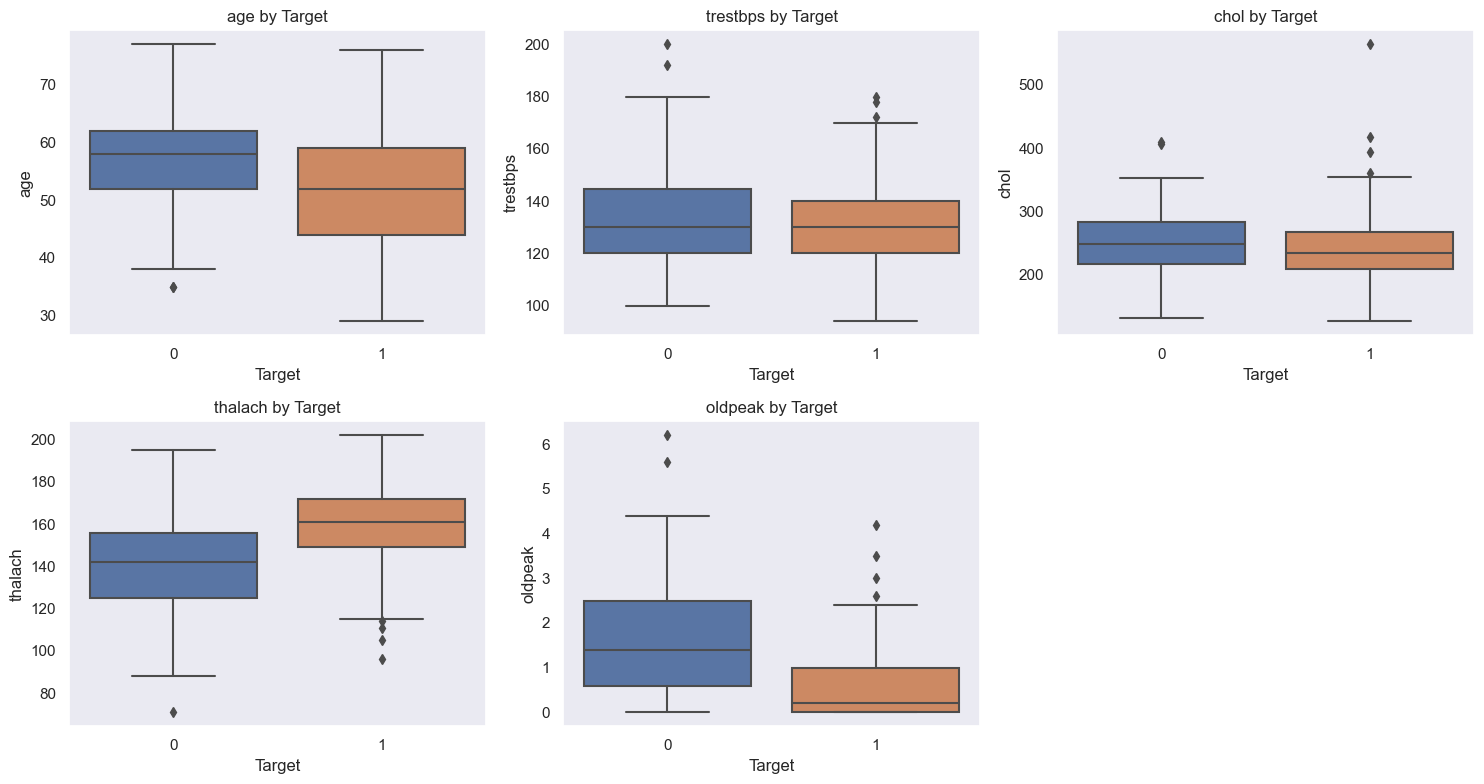

In [31]:
columns = [col for col in numerical_col if col != 'target']

# Create a grid of subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2,3, figsize=(15, 8))

# Flatten the axes array
#axes = axes.flatten()

# Plot histograms using Seaborn in a loop with enumerate
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df,x='target',y=column,ax=axes[row, col])
    axes[row, col].set_title(f'{column} by Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(column)


# Hide empty subplots if the number of columns is less than the number of subplots
for j in range(len(columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()


**Boxplot Observations :**
- Most of the variables ,almost similar for both categories , but **oldpeak** showing a prominent difference.
- Low Oldpeak candidates have high chances of heart disease .

#### 2.3.3 Analysis of Categorical Variables against Target Variable
- - In this section we'll analyse the relationship of *Categorical Variable with respect to the target variable* using plots,and draw our interpretation..

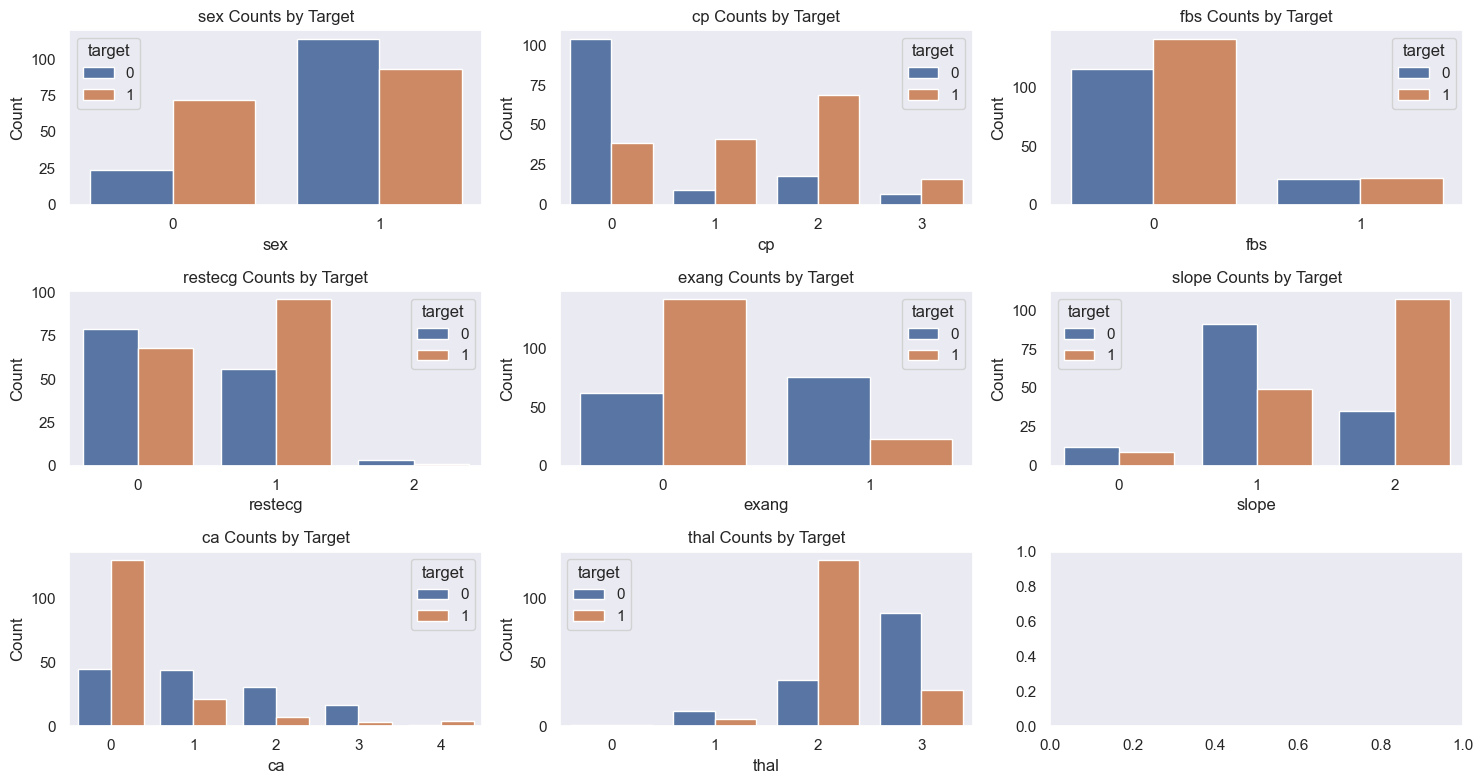

In [32]:

categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']

# Create a grid of subplots
num_cols = 3
num_rows = (len(categorical_col) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array
axes = axes.flatten()

# Plot countplots using Seaborn in a loop
for i, column in enumerate(categorical_col):
    if column != 'target':
        sns.countplot(data=df, x=column, hue='target', ax=axes[i])
        axes[i].set_title(f'{column} Counts by Target')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

# Hide empty subplots if the number of columns is less than the number of subplots
for j in range(len(categorical_col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


**Countplot Observations**
- **Sex** : Females seems more prone to heart diseases ,as compared Male.
- **cp** : Among all values of cp , 1 and 2 are very much indicative of heart disease ,proven to be an important factor.
- **fbs** : 
   - During univariate analysis,and stats analysis also we saw that ,*fbs* is not very useful for prediction.
   - Both categories are equi-probable to heart disease.
- **restecg** : Attention should be paid to patients with a "rest ecg" value of 1. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack.
- **exang** : If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher.
- **slope** - patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack, samwe goes for value of 1 with less chances than value 3.
- **ca** - Although value 0 is quite evident in the plot , to give attention to such patients , but 4 is also need to be taken care of.
- **thal** - Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not.
The opposite is true for other values. The situation of not having a heart attack appears to be higher.

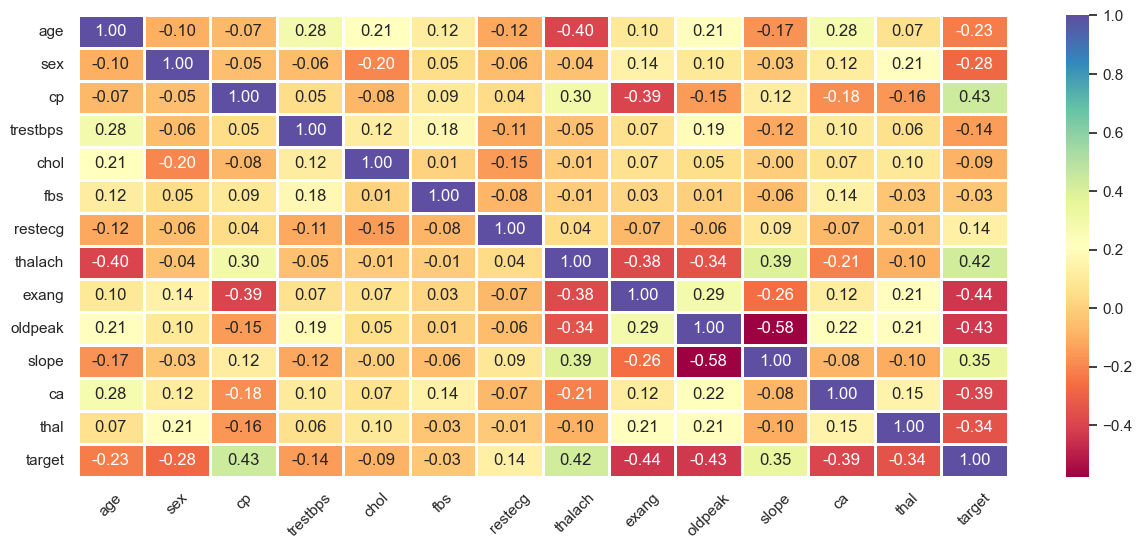

In [33]:
plt.figure(figsize = (15, 6))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True,fmt='.2f', linewidths=1)
plt.yticks(rotation=360);
plt.xticks(rotation=45);

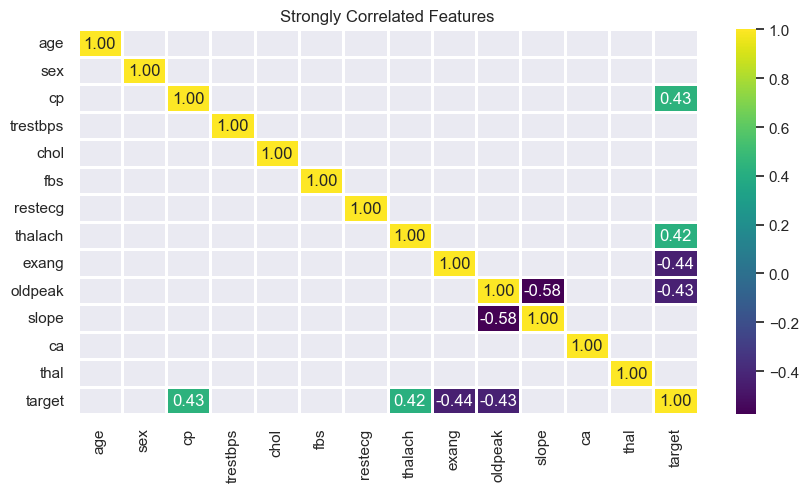

In [34]:
#setting a threshold of 0.4 to marking good correlation
correlation_matrix=df.corr()
threshold = 0.4

# Creating a mask to hide weaker correlations
mask = np.abs(correlation_matrix) < threshold
masked_corr_matrix = correlation_matrix.mask(mask)

# Plotting the heatmap with the masked correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(masked_corr_matrix, annot=True, cmap='viridis',fmt='.2f', linewidths=1)
plt.title('Strongly Correlated Features')
plt.show()

- target (presence of heart disease) shows **moderate correlations** with several other features namely *cp,thalach,exang,oldpeak* indicating potential predictive relationships between these features and the presence of heart disease.

In [35]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


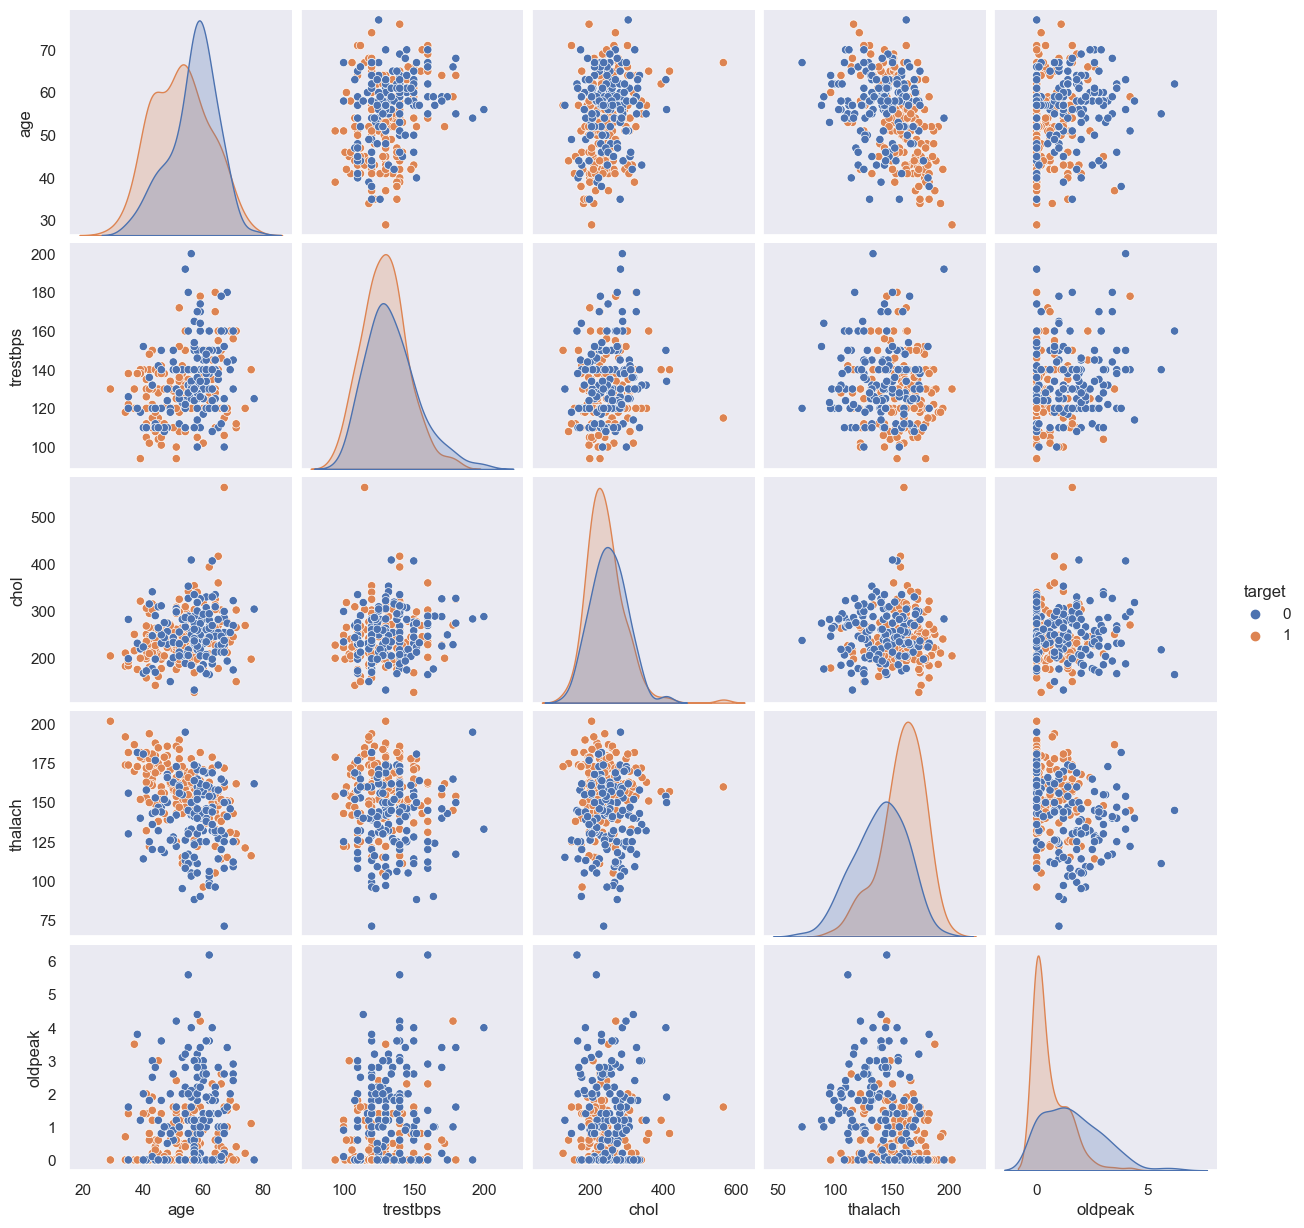

In [36]:
sns.pairplot(df[numerical_col], diag_kind = "kde",hue='target')

**Conclusion of EDA:**
- Except *age* all the other numerical features need outlier treatment.
- *thal* contains 2 null values/unknown ,we need to treat those null values also.
- Except *fbs* and *restecg* all the features are important for prediction with varying level of importance.
- Most of the features are normally or nearly normally distributed. 

## 3. Data Preprocessing and Cleaning

In [37]:
#Creating a copy of original dataframe
df_clean=df.copy()

### 3.1 Null Value Treatment:

In [38]:
df_clean['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

- We are going to fill the categorical null value with the most occured points i.e 2

In [39]:
thal_mode = df_clean['thal'].mode()[0]  # Get the mode of 'thal'

# Replace 0s in 'thal' column with NaN
df_clean['thal'].replace(0, pd.NA, inplace=True)

# Fill NaN values in 'thal' column with the mode
df_clean['thal'].fillna(thal_mode, inplace=True)

In [40]:
#After replacing with mode value
df_clean.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3.2 Outlier Treatment:

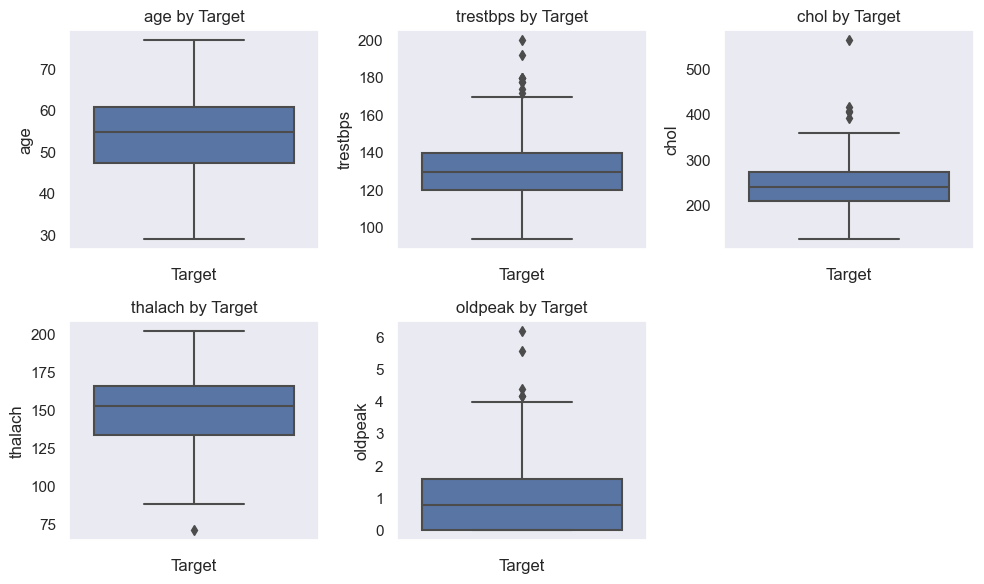

In [41]:
columns = [col for col in numerical_col if col != 'target']

# Create a grid of subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2,3, figsize=(10, 6))

# Plot histograms using Seaborn in a loop with enumerate
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_clean,y=column,ax=axes[row, col])
    axes[row, col].set_title(f'{column} by Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(column)


# Hide empty subplots if the number of columns is less than the number of subplots
for j in range(len(columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
#creating a function to remove outliers
def remove_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]
    return cleaned_data

In [43]:
for i in columns:
    df_clean=remove_outliers(df_clean,i)

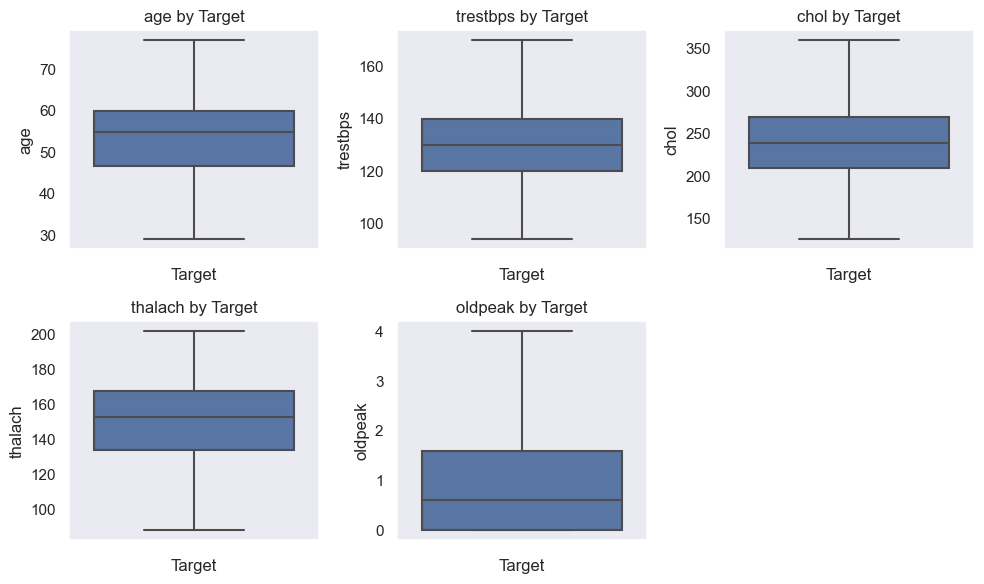

In [44]:
columns = [col for col in numerical_col if col != 'target']

# Create a grid of subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2,3, figsize=(10, 6))

# Plot histograms using Seaborn in a loop with enumerate
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_clean,y=column,ax=axes[row, col])
    axes[row, col].set_title(f'{column} by Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(column)


# Hide empty subplots if the number of columns is less than the number of subplots
for j in range(len(columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [45]:
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 4. Modelling 

### 4.1 Seperating the Target Variable and Splitting Training and Testing set

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [47]:

X = df_clean.drop(["target"],axis=1)
y = df_clean["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4.2 Scaling the features

In [48]:
scaler = StandardScaler()
# Scaling the features
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 4.1 Decision Tree Classifier

In [49]:
#Training the decision tree model
dt_clf=DecisionTreeClassifier(random_state=3)
dt_clf.fit(X_train,y_train)

# Predictions and evaluation
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for Decision Tree is : {accuracy:.2f}")

Accuracy Score for Decision Tree is : 0.82


In [50]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.86      0.81      0.83        31

    accuracy                           0.82        57
   macro avg       0.82      0.83      0.82        57
weighted avg       0.83      0.82      0.82        57



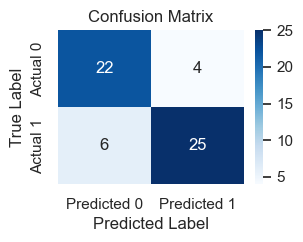

In [51]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.8263


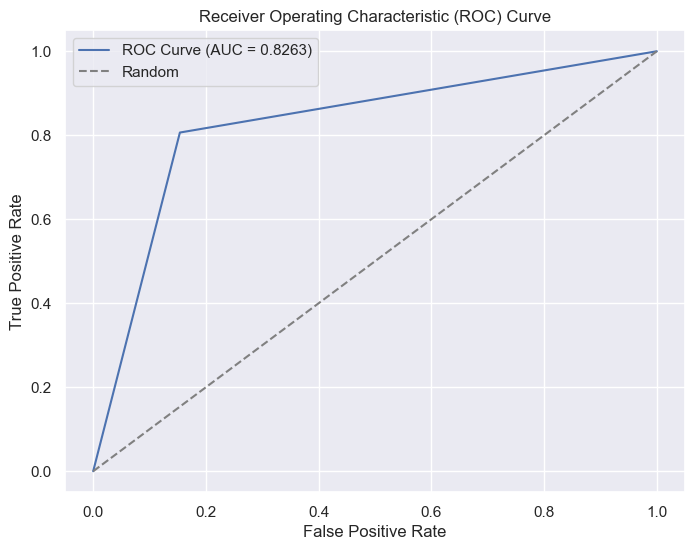

In [52]:
# Predict probabilities for the positive class (class 1)
y_probs = dt_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [53]:
#Cross Validation
cv_scores = cross_val_score(dt_clf, X, y, cv=10)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ")

Mean Accuracy: 0.7560 


### 4.2  Naive Bayes Classifier

In [54]:
nb_clf = GaussianNB()

# Training the classifier
nb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_clf.predict(X_test)
print(f"Accuracy Score for Decision Tree is : {accuracy:.2f}")

Accuracy Score for Decision Tree is : 0.82


In [55]:
#Cross Validation
cv_scores = cross_val_score(nb_clf, X, y, cv=10)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ")

Mean Accuracy: 0.8200 


In [56]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.81      0.84      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



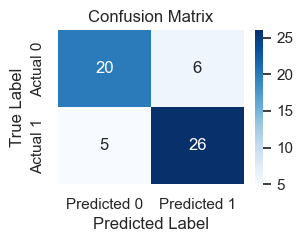

In [57]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.8896


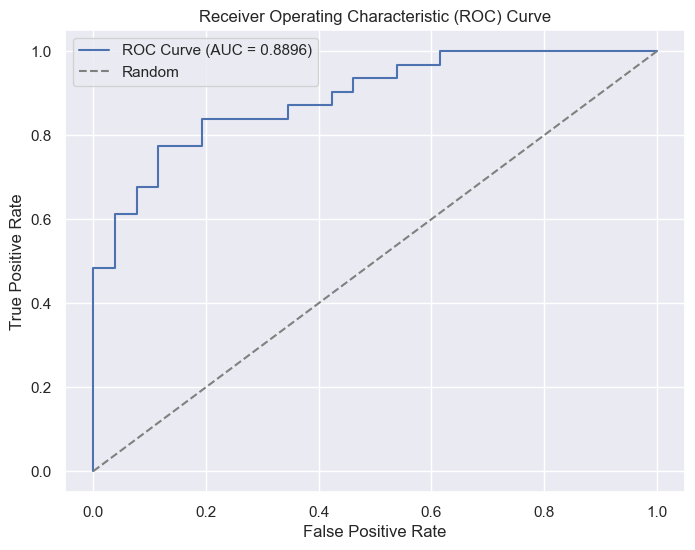

In [58]:
# Predict probabilities for the positive class (class 1)
y_probs = nb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

### 4.3  Random Forest Classifier

In [59]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8245614035087719


In [60]:
#Cross Validation
cv_scores = cross_val_score(rf_clf, X, y, cv=10)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ")

Mean Accuracy: 0.8095 


In [61]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



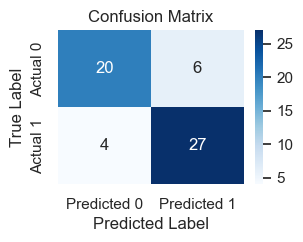

In [62]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.9243


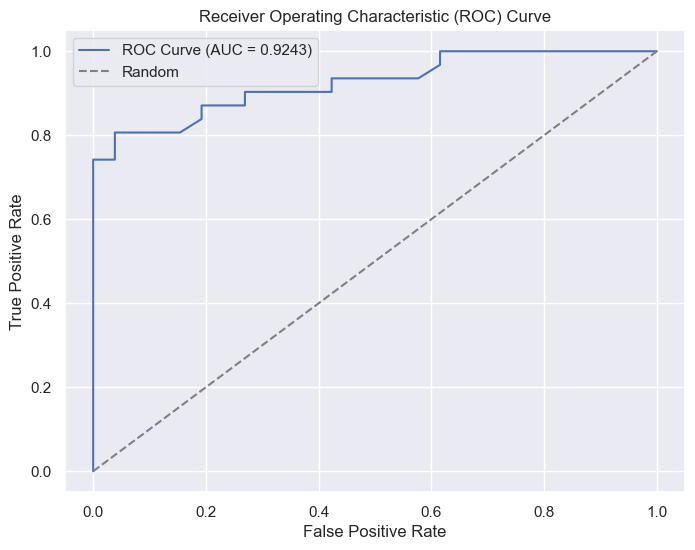

In [63]:
# Predict probabilities for the positive class (class 1)
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

**Conclusion of the Models**
- Overall Random Forest Classifier best  **cross validated accuracy score** of around **83%** followed by Naive Bayes Classifier and then Decision Tree.
- In terms of **AUC ROC score** Random Forest Classifier performing exceptionally good with a score of **92%**.
- So clearly Random Forest is performing very good ,so we'll use this model for hyperparameter tuning.

In [64]:
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform Grid Search cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Test Set: {accuracy:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8503
Accuracy Score on Test Set: 0.8596


In [65]:
# Initializing Random Forest classifier with specified hyperparameters
rf_clf = RandomForestClassifier(#random_state=5,
                                n_estimators=100, min_samples_leaf=2, min_samples_split=2,max_depth=10)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate and print the test accuracy score of the Random Forest model
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))


The test accuracy score of Random Forest is 0.8771929824561403


In [73]:
#Cross Validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ")

Mean Accuracy: 0.8378 


## Conclusion :
- For the given heart disease problem ,Random Forest Classifier is a winnner in terms of prediction , achieving the **cross-validated score** of **83%**.
- For further improvement in the model we can use feature importance metrics , and drop unimportant metrics.
- We can Bagging technique with other classifiers ,such as logistic, naive bayes.
